<a href="https://colab.research.google.com/github/naomori/codexa_LinearRegression_Practice/blob/master/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最小二乗法を使って線形回帰モデルを構築



## ライブラリのインポート

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## データセットの準備と確認

In [4]:
!ls

sample_data  slr06.csv	slr06.xls


In [5]:
data = pd.read_csv('slr06.csv')
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


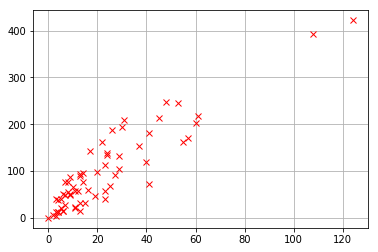

In [6]:
plt.plot(data['X'], data['Y'], 'rx')
plt.grid(True)
plt.show()

In [7]:
x = data['X']
y = data['Y']
x.shape, y.shape

((63,), (63,))

## Section.3: 最小二乗法を使ってみる

$y = w_1x + w_0$

$w_1 = \frac{共分散(x,y)}{分散(x)^2}$

$w_0 = \overline{y} - w_1\overline{x}$

まず、$w_1$ を求めて、その後で $w_0$ を求める。

In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)

print(mean_x)
print(mean_y)

22.904761904761905
98.18730158730159


In [10]:
n = len(x)
print(n)

63


In [0]:
covariance = 0
variance = 0

In [12]:
for i in range(n):
  covariance += (1/n) * (x[i] - mean_x) * (y[i] - mean_y)
  variance += (1/n) * (x[i] - mean_x)**2
w1 = covariance / variance
print(w1)

3.413823560066365


$w_0 = \overline{y} - w_1\overline{x}$

In [14]:
w0 = mean_y - (w1 * mean_x)
print(w0)

19.994485759114852


$保険金支払総額 = 3.414 \times 保険金請求件数 + 19.994$

## Section.4: モデルを使って予測と評価

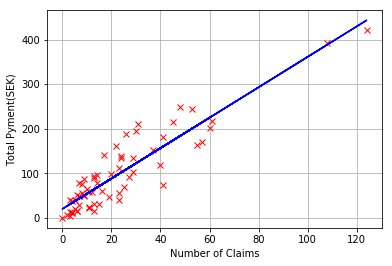

In [15]:
plt.plot(data['X'], data['Y'], 'rx')
plt.plot(data['X'], data['X'] * w1 + w0, 'b-')
plt.xlabel('Number of Claims')
plt.ylabel('Total Pyment(SEK)')
plt.grid(True)
plt.show()

In [16]:
# 保険金請求が 90 件あった場合の保険金支払い総額の予測

pred = w1 * 90 + w0
print(pred)

327.23860616508773


### 線形モデル式の評価

Root Mean Square Error (RMSE) を、導出した線形モデル式の評価に用いる。  
評価には様々な手法があるが、今回は**RMSE**を使ってみる。

RMSE: 平均二乗誤差：残差（予測値と実際値の誤差）の標準偏差

RMSE は「線形モデルの直線がデータに対してどれだけフィットしているか」を表す。

$RMSE = \sqrt{\sum_{n=1}^n}\frac{1}{n}(\hat{y}-y_i)^2$

* $\hat{y}_i$: i番目の予測値
* $y_i$: i番目の実際値



In [17]:
# RMSE

rmse = 0
for i in range(n):
  y_pred = w1 * x[i] + w0
  rmse += (y_pred - y[i]) ** 2
rmse = np.sqrt(rmse / n)
print(rmse)

35.36582996879147
